In [22]:
from sklearn.datasets import fetch_california_housing
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
dataset = fetch_california_housing()

In [6]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [11]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
df['Price']=dataset.target

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
#checking null counts
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

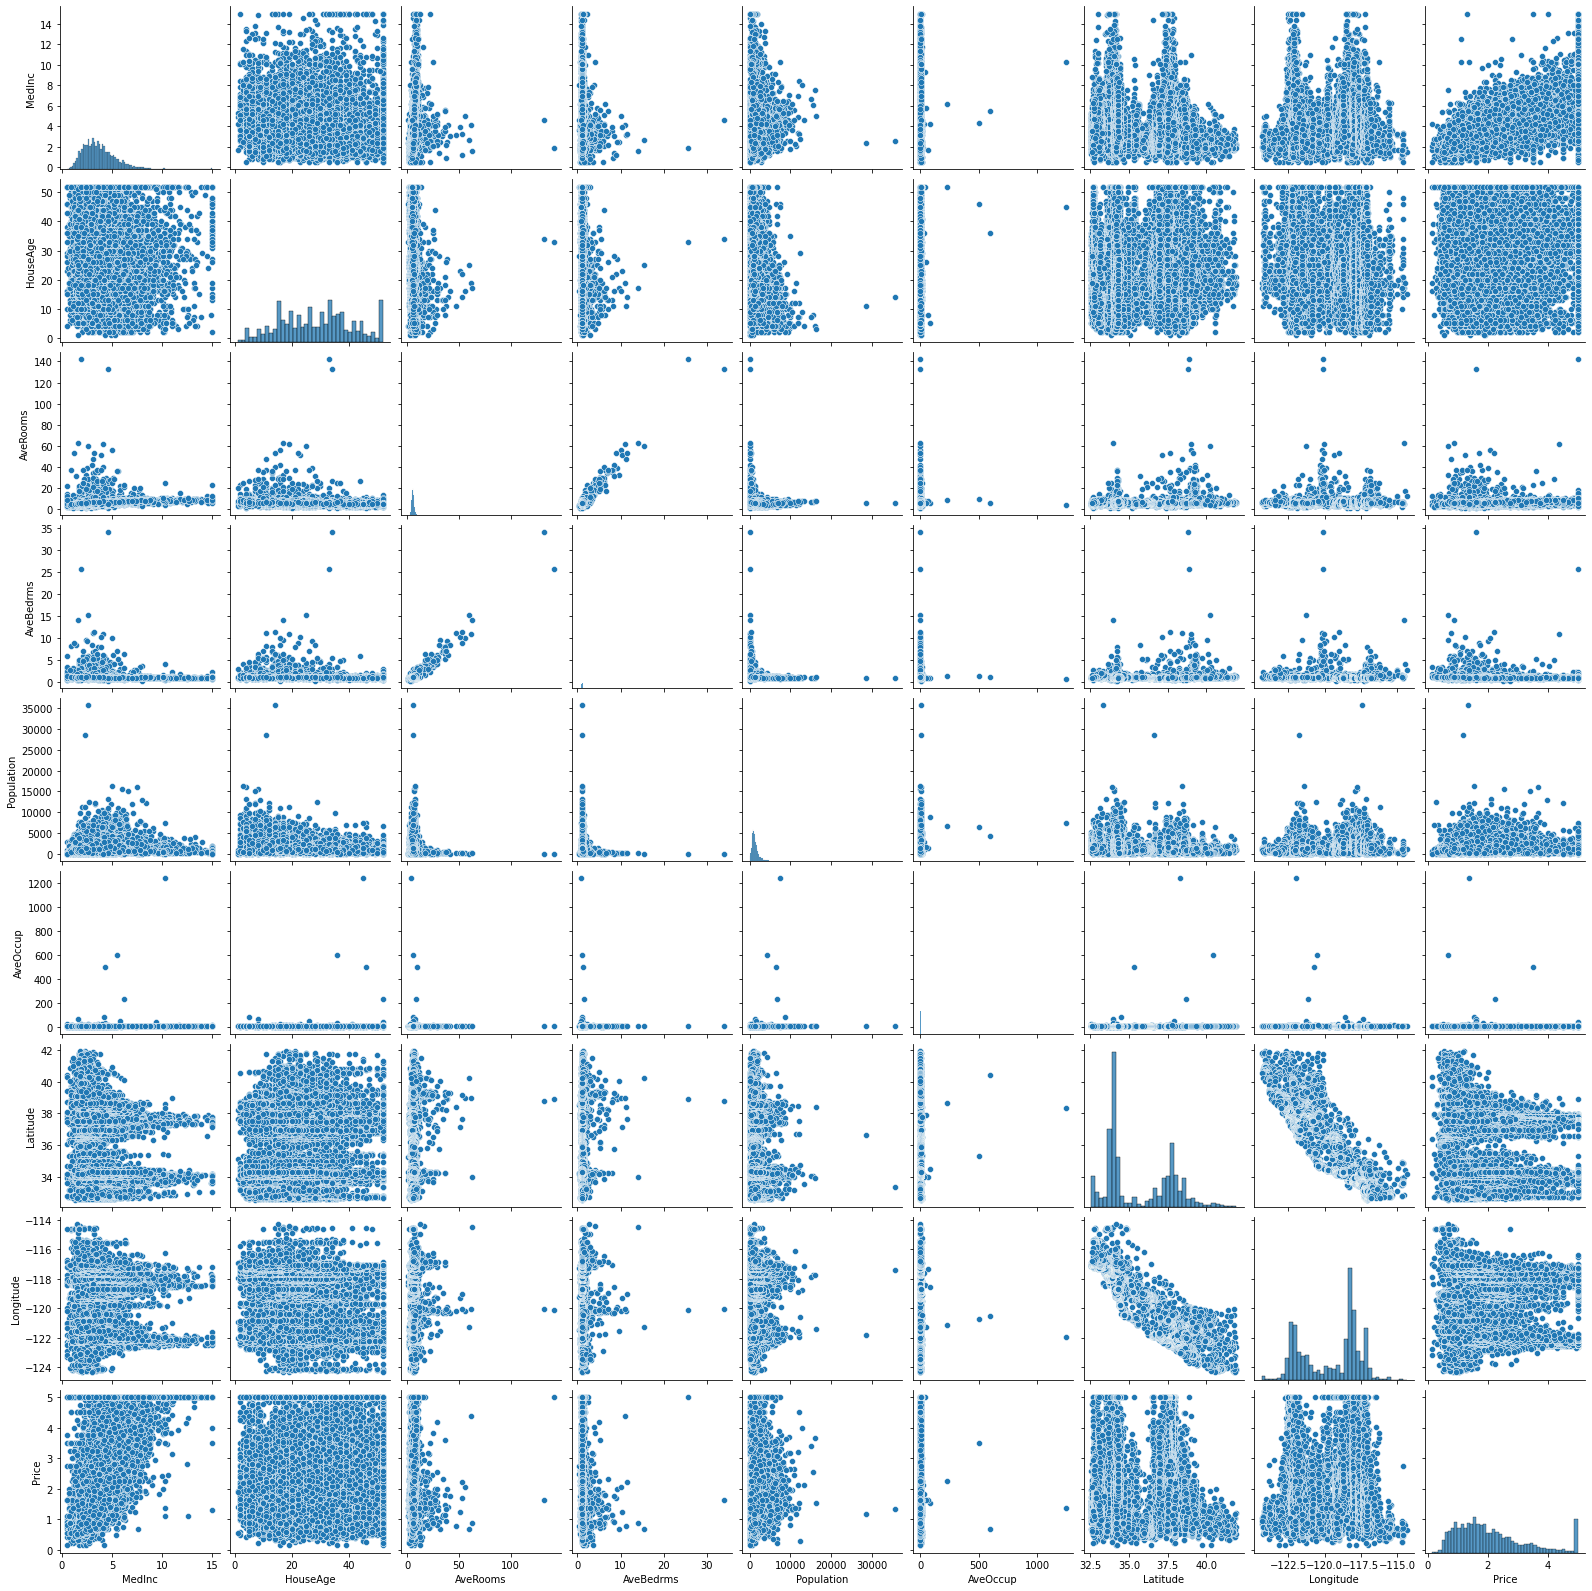

In [23]:
sns.pairplot(df)

In [25]:
df.shape

(20640, 9)

In [26]:
df_copy = df.sample(frac=0.25)

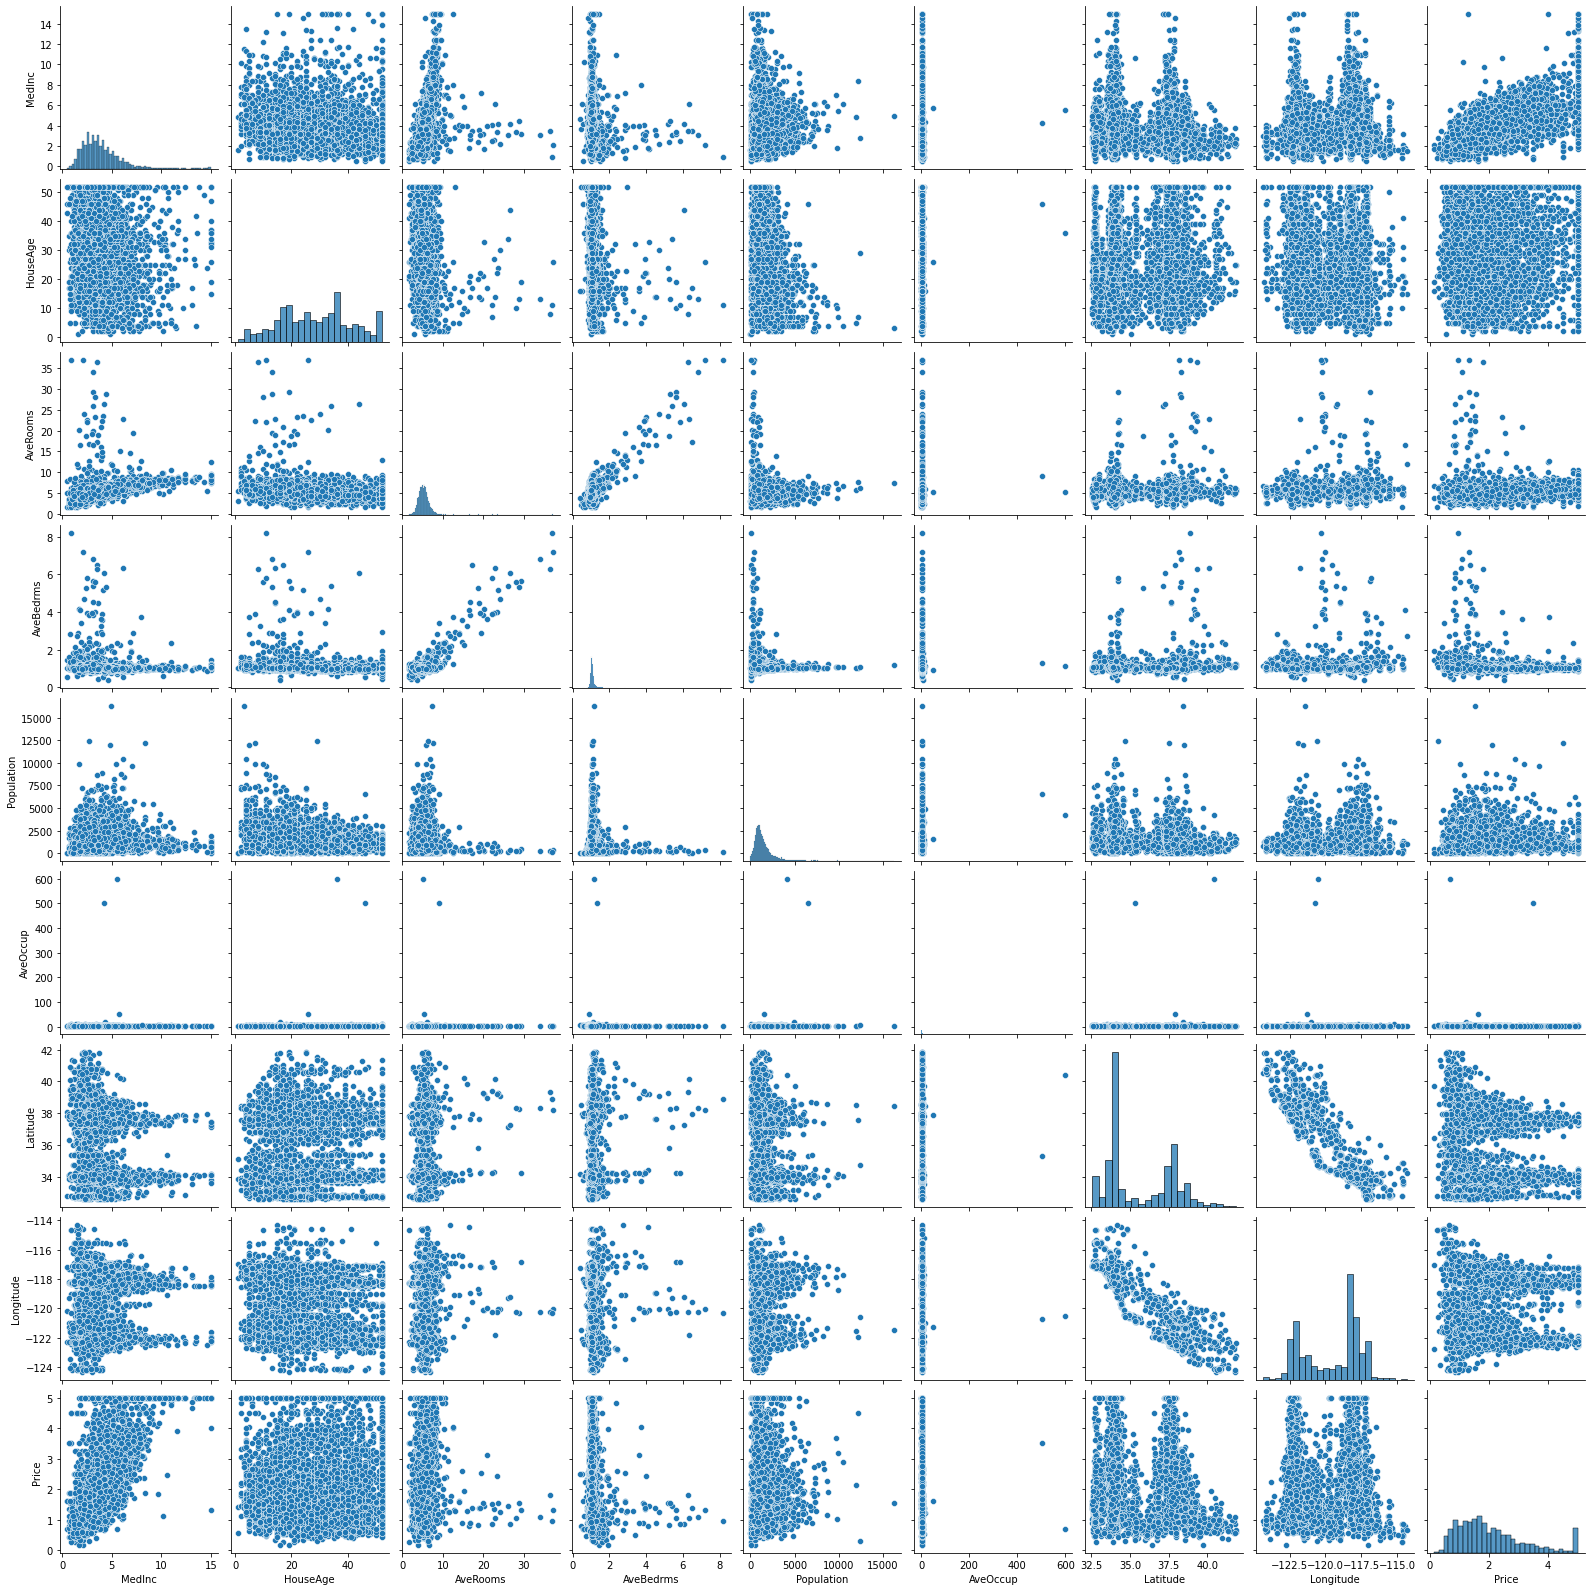

In [27]:
sns.pairplot(df_copy)

In [29]:
#divide dataset into dependent and independent features
#divide teh dataset into train and test

X = df.iloc[:,:-1]

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
y = df.iloc[:,-1]

y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [34]:
X_train.shape

(13828, 8)

In [35]:
X_test.shape

(6812, 8)

In [36]:
y_train.shape

(13828,)

In [37]:
y_test.shape

(6812,)

In [39]:
#feature scaling - standardization (mean 0 and std deviation 1)   Z = (X-MEAN)/STD_DEV

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

#FIT_TRANSOFRM IS applied on X train only
#on test data we only apply transform formula to avoid data leak

In [43]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [44]:
X_test = scaler.transform(X_test)

In [45]:
#we don't need to apply feature scaling on y value

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regression = LinearRegression()

In [50]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [53]:
regression.intercept_

2.0666362048018536

In [54]:
y_pred = regression.predict(X_test)

In [55]:
#MSE, MAE, RMSE

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse = mean_squared_error(y_test,y_pred)

print(mse)

mae=mean_absolute_error(y_test,y_pred)

print(mae)

print(np.sqrt(mse))

0.5369686543372463
0.5295710106684453
0.7327814505957737


In [58]:
#accuracy r2 and adjusted r square

from sklearn.metrics import r2_score

In [60]:
score = r2_score(y_test,y_pred)

In [61]:
score

0.5970494128783951

In [62]:
adj_score = 1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [63]:
adj_score

0.5968931623477871

In [64]:
#ridge
from sklearn.linear_model import Ridge

In [65]:
ridge = Ridge()

In [66]:
ridge.fit(X_train,y_train)

Ridge()

In [67]:
y_pred= ridge.predict(X_test)

In [68]:
mse = mean_squared_error(y_test,y_pred)

print(mse)

mae=mean_absolute_error(y_test,y_pred)

print(mae)

print(np.sqrt(mse))

0.5369457054801821
0.5295668709657083
0.7327657916962159


In [69]:
#laso

from sklearn.linear_model import Lasso

In [70]:
lasso = Lasso()

In [71]:
lasso.fit(X_train,y_train)
y_pred= lasso.predict(X_test)

In [72]:
mse = mean_squared_error(y_test,y_pred)

print(mse)

mae=mean_absolute_error(y_test,y_pred)

print(mae)

print(np.sqrt(mse))

1.3326257277946882
0.9126511897647483
1.15439409553007


In [73]:
#elastic Net

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(X_train,y_train)
y_pred= elastic.predict(X_test)




In [74]:
mse = mean_squared_error(y_test,y_pred)

print(mse)

mae=mean_absolute_error(y_test,y_pred)

print(mae)

print(np.sqrt(mse))

1.061031401183927
0.8119183692654034
1.0300637850074756
